## **Simple Linear Regression** :

It is one of the basic ML algorithm for output predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.
It comes under *supervised learning* technique.

#****Linear Regresssion :****
###->Simple ,->Multiple

**Linear regression algorithm** shows a linear relationship between a dependent (y) and one or more independent (y) variables, i.e  it finds how the value of the dependent variable is changing according to the value of the independent variable.


**Simple Linear regression** :     


*   It deals with data which has only 1 dependent variable(y)
*   It had only 1 independent value (x)
*   It is of form y=mx+c i.e it represents a straight line ,it is called regression line.
* It closely mimics to provide nearest output(predicted) to that of it was its actual .

In ML terms the eqn : y=Ax1 + x0  , A= Coefficient , X0 = error/slope intercept
*   The data should be **Lineaarly Separable(classifiable)** , i.e a straight line should be able to draw among the output datapoint ,such that it'll be at least sum of squares of perpendicualr distance from output datapoint on to our straight line
*The line we draw should separate the outputs classes on to 2 of it sides.
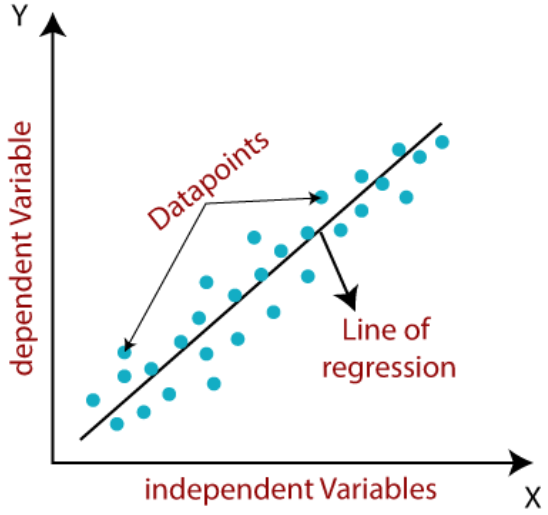


1.   More than 1 independent value (x1,x2,x3..) & 1 dependent value(y) => **Linear regression**
2.   Its  ML eqn : y=Ax1+Bx2+...x0  ; A,B,C = Coeffiecients
3.   **If we have k independent variables. We will get k coefficient values.**





**WHAT WE NEED TO DO**  we need to find the coefficients values , so that we can predict the output y for any x value as input

In [7]:
#The Prerequsite math fuction we need to prepare are Mean , Variance , co variance
def cal_mean(readings):
  sum_read=sum(readings)
  no_of=len(readings)
  mean=sum_read/no_of
  return sum_read/no_of

def cal_variance(readings):
  mean=cal_mean(readings)
  mean_diff=[(mean-datapoint)**2 for datapoint in readings]
  sum_of_mean_diff=sum(mean_diff)
  variance=sum_of_mean_diff/(len(readings)-1)
  return variance

def cal_covariance(reading1,reading2): #cOVARIANCE Helps us to know whether is their any relation between 2 datasets
  mean_read1=cal_mean(reading1)
  mean_read2=cal_mean(reading2)
  sum_of_product_mean_diff=0
  for i in range(len(reading1)):
    sum_of_product_mean_diff+=(reading1[i]-mean_read1)*(reading2[i]-mean_read2)
  covariance=sum_of_product_mean_diff/(len(reading1)-1)


def cal_simple_linear_regrs_coeff(x_readings, y_readings):
  w1=cal_covariance(x_readings,y_readings)/cal_variance(x_readings)
  w0= cal_mean(y_readings)-w1*cal_mean(x_readings)
  return w1,w0


In [13]:
import pandas as pd
def simple_linear_regrsn(data):
  # data.head()
  d_columns=list(data.columns[:])
  # print(d_columns)
  print("head of data:\n",data.head())
  # print(data.info())
  squarefeet_mean=cal_mean(data[d_columns[1]])
  price_mean=cal_mean(data[d_columns[2]])

  squarefeet_variance=cal_variance(data[d_columns[1]])
  price_variance=cal_variance(data[d_columns[2]])

  covariance_of_price_and_square_feet = data.cov()[d_columns[1]][d_columns[2]]
  w1 = covariance_of_price_and_square_feet / float(squarefeet_variance)

  w0 = price_mean - (w1 * squarefeet_mean)

  # Predictions
  data['Predicted_Price'] = w0 + w1 * data[d_columns[1]]
  print("The coefficients of x1 [i.e Ax1]: A=",w1," x0 =" ,w0)
  print("The predicted price using coefficients :\n")
  print(data)


  # A=cal_covariance(data[d_columns[1]],data[d_columns[2]])/cal_variance(data[d_columns[1]])
  # B=cal_mean(data[d_columns[2]]-A*data[d_columns[1]])

  x_ip=int(input("\n Give some input to predict its output :"))
  print("the predicted cost of",x_ip,'is',w1*x_ip + w0)
  return (data)



In [14]:

Houseprice_dataset=pd.read_csv('/content/house price simple linear regrsn.csv')
data=simple_linear_regrsn(Houseprice_dataset)
# print(data)

head of data:
    no.  square_feet  price
0    1          150   6450
1    2          200   7450
2    3          250   8450
3    4          300   9450
4    5          350  11450
The coefficients of x1 [i.e Ax1]: A= 28.77659574468085  x0 = 1771.8085106382969
The predicted price using coefficients :

   no.  square_feet  price  Predicted_Price
0    1          150   6450      6088.297872
1    2          200   7450      7527.127660
2    3          250   8450      8965.957447
3    4          300   9450     10404.787234
4    5          350  11450     11843.617021
5    6          400  15450     13282.446809
6    7          600  18450     19037.765957

 Give some input to predict its output :650
the predicted cost of 650 is 20476.59574468085


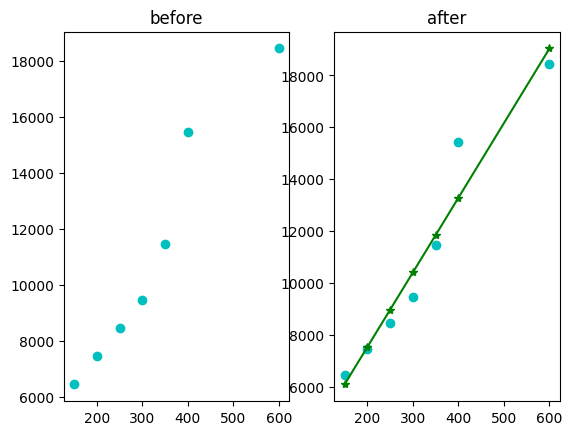

In [23]:
import matplotlib.pyplot as plt
xpoint=data['square_feet']
ypoint=data['price']
y2=data['Predicted_Price']
plt.subplot(1,2,1)
plt.title('before')
plt.plot(xpoint,ypoint,"oc")

plt.subplot(1,2,2)
plt.title('after')
plt.plot(xpoint,ypoint,"oc")
plt.plot(xpoint,y2,"*g-")

